# PHYS 710 Quantum Computation Term Project: Development of A Supervised Quantum Neural Network for Galaxy Detection

## 1- Introduction

The primary objective of this project is to perform galaxy classification/identification using **Quantum Neural Networks (QNN)**. This project also aims to analyze the efficieny of QNNs by evaluating the impact of different data encoding methods and different sizes of training data sets on model performance. This project, which can be used to compare the performance of QNNs with classical NNs on small datasets, also demonstrates the impact of different data encoders on model accuracy, training time, and generalization capacity.


The accurate classification of galaxies plays a critical role in modern astrophysics, enabling researchers to understand the formation, evolution, and physical characteristics of galaxies. This project provides a new perspective on galaxy classification by leveraging QNNs and analyzing their potential advantages. The importance of this project can be summarized as follows:
1. **Contribution to Astrophysics:** Demonstrating the applicability of QNNs for galaxy classification tasks.
2. **Comparison of QNNs and Neural Networks:** Investigating the advantages of QNNs over classical neural networks.
3. **Higher Efficiency with Small Training Datasets:** Highlighting the potential of QNNs to achieve better and faster results with smaller datasets.

The Galaxy Zoo project [1] highlights the limitations of classical methods in galaxy classification. This citizen science initiative involved non-scientists to manually classify over 820,000 galaxies, as analyzing such a large dataset was not feasible with classical models. However, in a scenario where a QNN trained on small datasets is optimized, and the overfitting issue is resolved, it could become possible to train a highly consistent model for datasets of this magnitude.

Additionally, the project provides a significant contribution by demonstrating the applicability of a quantum approach for such classification tasks. Quantum Neural Networks (QNNs) leverage quantum properties such as superposition and entanglement to efficiently process complex datasets and capture detailed relationships within the data [2]. While it can be shown that QNNs may outperform classical methods in terms of accuracy and speed with small datasets, quantum models can enable efficient classification without relying on human input. Machine learning methods are often used in image recognition and have proven effective at finding and classifying features in complex datasets [3].

In summary, this project aims to demonstrate the potential of QNNs to achieve better results with small training datasets compared to classical neural networks, test their applicability for galaxy detection, and explore the model's responses to various parameters.

## 2- Methods

### 2.1- Data Preparation

The dataset used in this study is derived from the Hubble Deep Field image [4]. High-quality telescope images were preprocessed by splitting the original image into smaller sections and converting them to grayscale. Images were further normalized and binarized based on shape and luminosity criteria to enhance classification accuracy.

* The training dataset was constructed using 25 galaxy and 25 non-galaxy images (total 50 images).
* Additional datasets of varying sizes were used to evaluate model performance:
  * 26 images (13 galaxy + 13 non-galaxy)
  * 76 images (38 galaxy + 38 non-galaxy)
  * 100 images (50 galaxy + 50 non-galaxy)

The dataset used for model training was evaluated for accuracy on the training data, and the model's generalization was further tested using a completely independent test dataset of the same size and half the size of the training dataset. Subsequently, the model's accuracy was evaluated using a completely different test dataset of the same size and half the size of the training dataset.

### 2.2- Model Design

The quantum model leveraged a hybrid neural network architecture with the following key components:
* **Trainable Model Circuit (ansat)**: A Two Local circuit was employed for parameterized quantum operations.
* **Data Encoder**: Two encoding schemes were tested:
  * **Modified Two Local**: A variation of the standard Two Local encoding to better capture the input data's features. (A Hadamard gate, used to create superposition states, was applied to each qubit.)
  * **PauliFeatureMap**: Encodes classical data into quantum states using PauliFeatureMap.
* **SamplerQNN**: The SampleQNN framework was used, with a BaseSampler backend and Torch integration. The optimization was conducted using the LBFGS optimizer.

### 2.3- Training and Optimization

The models were trained using a supervised learning approach. To optimize performance, experiments were conducted with varying learning rates (0.01, 0.05, 0.10, 0.20) and datasets of different sizes. Key aspects include:
* The QNNs were trained on progressively larger datasets to evaluate scalability, and their generalization was tested on datasets of matching and reduced sizes.
* The impact of different encoders and learning rates on training accuracy, test accuracy, and training time was analyzed.

### 2.4- Metrics for Evaluation

The following metrics were used to compare QNN performance:
* **Training Accuracy**: To evaluate how well the model fits the training data.
* **Test Accuracy**: To assess generalization to unseen data by the model.
* **Training Time**: To measure computational efficiency.
* **Consistency Across Datasets**: To explore how the model performs with varying dataset sizes.

### 2.5- Limitations

The model training was conducted on a classical computer using quantum simulators that emulate the behavior of quantum circuits. The efficiency of the model, processed with pre-processed images, was identified and compared based on different variables. Simulating quantum circuits on a classical computer introduces certain limitations and may not fully reflect the performance of real quantum hardware, especially regarding noise. The study was carried out on small datasets using quantum simulators, which do not fully account for the noise and decoherence present in real quantum hardware. It is important to test on real quantum devices to evaluate the stability of the model under practical conditions.

## 3- Model Train Process

Below, how the code works is shown and explained step by step.
This version of the code is written for a training dataset consisting of 50 samples (25 galaxies + 25 non-galaxies) with a learning rate of 0.05. These parameters can be modified by the user as desired.


In [ ]:
!pip install qiskit_machine_learning
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit
!pip install qiskit-algorithms
!pip install qiskit-machine-learning
!pip install qiskit-Aer
!pip install qiskit-qulacs
!pip install matplotlib
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 351.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.7/962.7 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816

Import the dataset from the zipfile.

Load workspace(2).zip file to the colab workspace then exact with following code. All needed data is inside and ready to use.

The data used in the model can be downloaded via: https://drive.google.com/file/d/1t1lhGIpAwbtYA4MATMIajWb-RcuXU4Jx/view?usp=sharing


In [ ]:
import zipfile
import os

# ZIP file name to extract
zip_file_name = "workspace(2).zip"


with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("../")


Imports for data preprocessing.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


The high-resolution telescope image that will form the data set is divided into 64x64 pieces and saved in a folder and greyscaled.

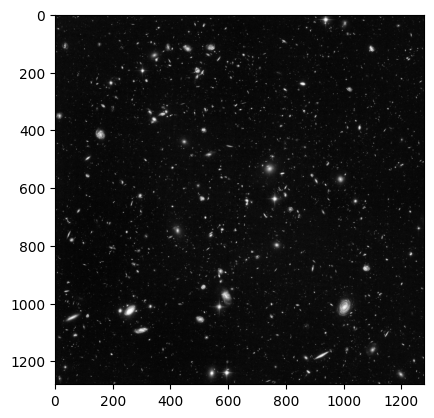

In [ ]:
cut1=64

img = Image.open('heic0611b.jpg').convert('L')
plt.imshow(img, cmap='gray')
img = np.asarray(img.getdata()).reshape((1280,1280))

for i in range(1280//cut1):
    for j in range(1280//cut1):
        cutimg = img[i*cut1:(i+1)*cut1]
        cutimg = cutimg[:,list(range(j*cut1,(j+1)*cut1))]
        plt.imsave('cutimages64/{} {}.jpg'.format(i,j), cutimg ,cmap='gray')

## Visualize one of the Images

Here we'll visualize , one of the images from the resulting folder , which we will use to further train and test our data.

In [ ]:
for i in range(1280//cut1):
    for j in range(1280//cut1):
        img16 = Image.open('cutimages64/{} {}.jpg'.format(i,j)).resize((32,32)).convert('L')
        img16 = np.asarray(img16.getdata()).reshape((32,32))


20 examples of images obtained after the partition process can be found below.

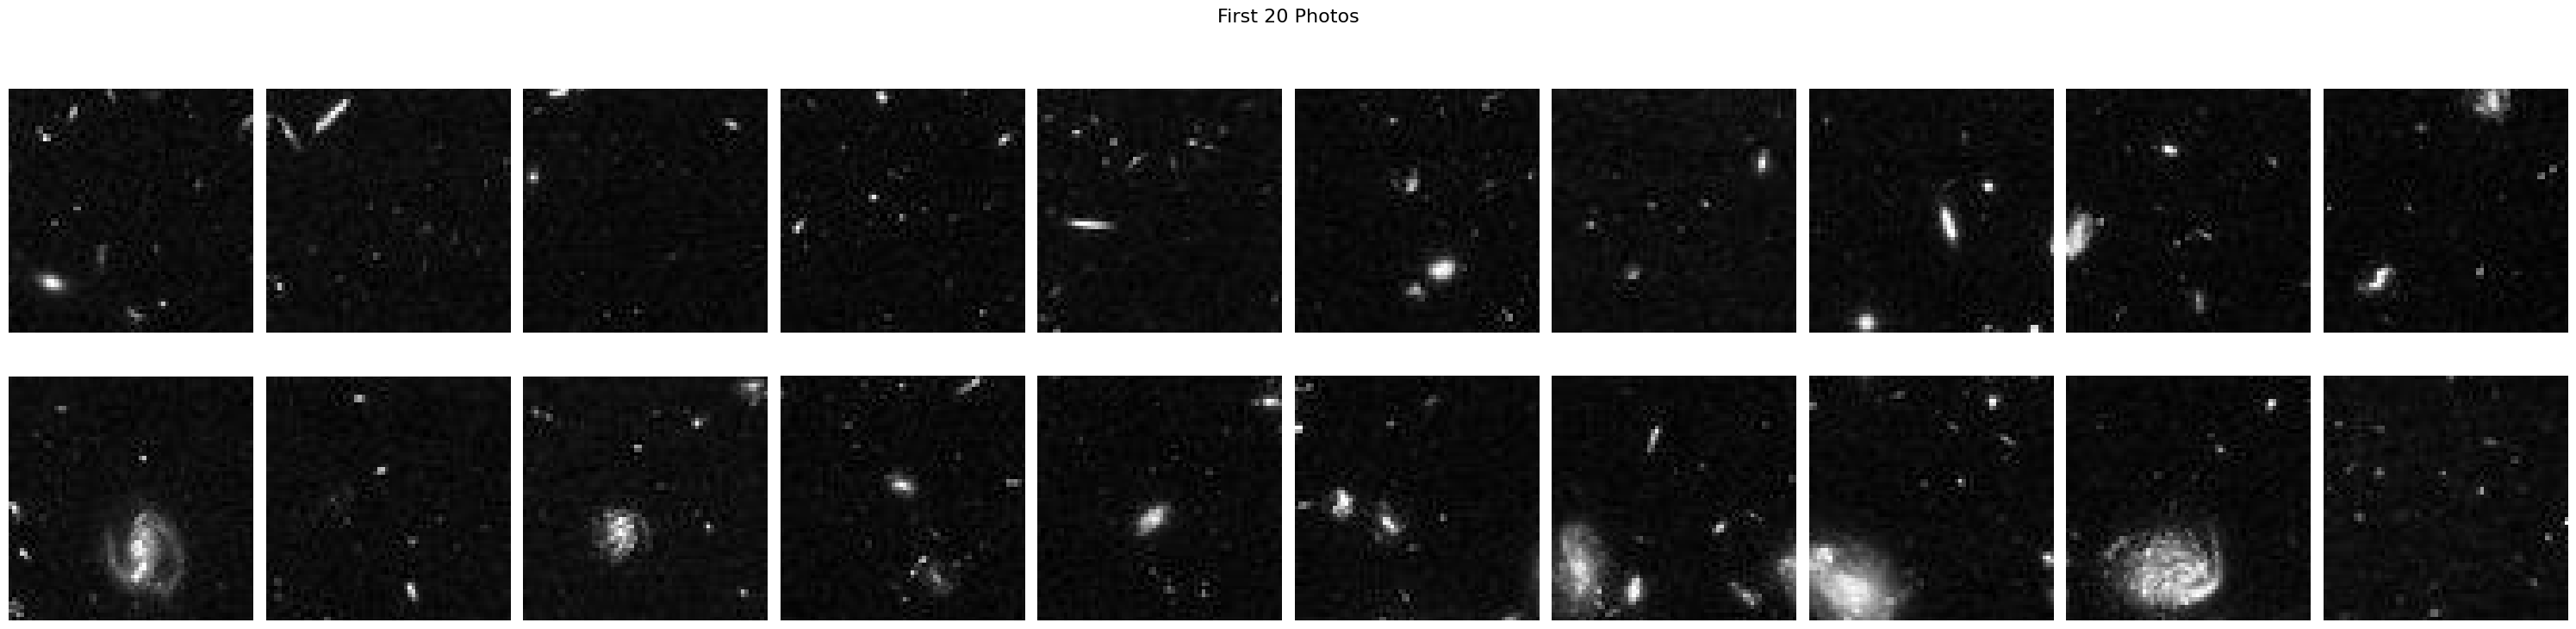

In [ ]:
cut_1 = 64
grid_rows, grid_cols = 2, 10

fig, axs = plt.subplots(grid_rows, grid_cols, figsize=(30, 8))
fig.suptitle('First 20 Photos', fontsize=16)

photo_count = 0
for i in range(grid_rows):
    for j in range(grid_cols):
        if photo_count >= 20:
            break
        img_path = 'cutimages64/{} {}.jpg'.format(photo_count // grid_cols, photo_count % grid_cols)
        img = Image.open(img_path).convert('L')
        img_array = np.asarray(img, dtype=np.float64)

        axs[i, j].imshow(img_array, cmap='gray')
        axs[i, j].axis('off')
        photo_count += 1

plt.tight_layout()
plt.show()

The code required to name the resulting images and save them in a new folder is shown.

**WARNING**: If you are not going to use the code with your own files and dataset, do not run the code below. Proceed to the marked next step!

In [ ]:
import os
import shutil

# Path to source and target folder
source_folder = 'cutimages64' #insert the source folder
destination_folder = 'renamed_images' #these will be your input folders for the model(galaxy and no-galaxy)

# Create target folder
os.makedirs(destination_folder, exist_ok=True)

# Rename files by order
file_list = sorted(os.listdir(source_folder), key=lambda x: (int(x.split()[0]), int(x.split()[1].split('.')[0])))

for index, old_name in enumerate(file_list, start=1):
    old_path = os.path.join(source_folder, old_name)
    new_name = f"{index}.jpg"
    new_path = os.path.join(destination_folder, new_name)
    shutil.copy2(old_path, new_path)  # Copy the files to the new folder

print(f"{len(file_list)} files have succesfully copied to {destination_folder} and renamed.")


400 files have succesfully copied to renamed_images and renamed.


Important note: Since the model will be subject to supervised training, the resulting images need to be manually sorted into two subfolders called "Galaxy" and "No-galaxy" within the "Original" folder. This process was done manually, the images were renamed using the code above and the dataset to be provided to the model was thus prepared.

If you plan to use your own data, pay attention to this step.
Create a "galaxy" folder containing at least 50 galaxy images and a "No-galaxy" folder containing at least 50 non-galaxy images with the split images you obtained. Then, name these images consecutively starting from 1 using the code above.


**Proceed with this step**

Here are the functions that will be used in the later parts of the code.

* callImage allows you to call images in the desired form.

* imageResize is used to resize images. It is used for smaller input and faster processing times.

* imageBinarize is the function used to convert the brightness data of each pixel in the images to the value 0 or 1

* normalizedata is the function required for normalization, used to reduce image to one dimension

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Calling each image from the path, and file name.
def callImage(i,path,name):
    x1 = Image.open(
        path+str(name)+str(i)+'.jpg').convert('L');
    y1 = np.asarray(x1.getdata(), dtype=np.float64).reshape((x1.size[1], x1.size[0]));
    y_dat1 = np.asarray(y1, dtype=np.uint8)
    return y_dat1

# Resize images into n x n pixel
def imageResize(data,pixel):
    image = Image.fromarray(data,'L')
    image= image.resize((pixel, pixel))
    image=np.asarray(image.getdata(), dtype=np.float64).reshape((image.size[1], image.size[0]))
    image=np.asarray(image, dtype=np.uint8)
    return image


# Binarizing images with a threshold
def imageBinarize(data):
    # threshold to binarize
    threshold = 75
    # make all pixels < threshold black
    bidata = 1.0 * (data > threshold)
    return bidata

def normlaizeData(data):

    testdata = data
    arr_data = testdata.flatten() / max(testdata.flatten());
    encoding_data = np.array([np.round(x, 6) for x in arr_data]);
    sum_const = np.sqrt(sum(encoding_data * encoding_data))
    encoding_norm = encoding_data / sum_const
    return encoding_norm

Quantum circuits are defined here.

* TLcircuit is ansatz using TwoLocal circuit
* Pencoding is circuit used for data encoding which includes modified version of TwoLocal

In [ ]:
# Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit.circuit.library import TwoLocal, PauliFeatureMap, RealAmplitudes, ZZFeatureMap
from qiskit.circuit import Parameter, ParameterVector
from qiskit.quantum_info import state_fidelity, SparsePauliOp
from qiskit.quantum_info.operators import Operator
from qiskit.utils import *
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit_machine_learning.neural_networks import EstimatorQNN, SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC

# Torch
import torch
from torch.autograd import Function
from torch import nn
import torch.optim as optim
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torchvision import datasets, transforms
from torch.optim import LBFGS, SGD,Adam

# General Libraries
from IPython.display import clear_output


In [ ]:
nqubits=6
num_inputs = 256


def TLcircuit(theta):

    # Define a TwoLocal circuit with ry rotations and linear entanglement
    pqc = TwoLocal(
        num_qubits=nqubits,
        rotation_blocks='ry',
        entanglement_blocks='cx',
        entanglement='linear',  # Linear entanglement, similar to circuit15
        reps=1,                 # Single repetition layer
        parameter_prefix='theta'  # Parameter prefix
    )
    # Bind parameters to the given theta values
    parameters = pqc.parameters
    theta_dict = dict(zip(parameters, theta[:len(parameters)]))
    return pqc.assign_parameters(theta_dict)

def Pencoding(theta, L):


    nqubits=6
    qr = QuantumRegister(nqubits)
    qc = QuantumCircuit(qr, name='Embed')

    count=0
    for i in range(nqubits):
        qc.h(i)

    for l in range(L):
        for i in range(nqubits):
            qc.ry(theta[count],i)
            count=count+1
        for i in range(nqubits-1):
            qc.cx(i,i+1)


        for i in range(nqubits):
            qc.ry(theta[count],i)
            count=count+1
        for i in range(nqubits-1):
            qc.cx(i+1,i)


    qc.to_instruction()
    return qc







def binary(x):
    return ('0' * (6 - len(bin(x)[2:])) + bin(x)[2:])

def firsttwo(x):
    return x[:2]

parity = lambda x: firsttwo(binary(x)).count('1') % 2

Sample Drawns for Twolocal and Pauli data encoder circuits are shown below. The number of layers and repeats is smaller than those used in the model in terms of readability and duration. Also, some parameters are fixed for drawing.

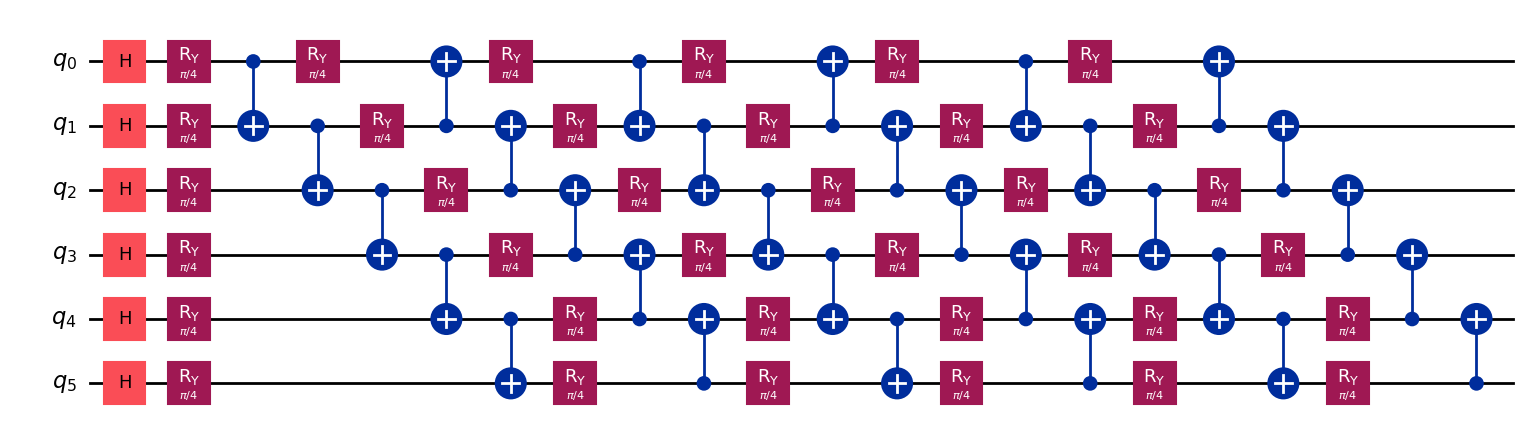

In [ ]:
nqubits = 6
L = 3  # Number of layers
num_params = nqubits * 2 * L  # Parameters for ry gates
theta = [np.pi/4] * num_params  # Example parameter values

# Generate the circuit using Pencoding
feature_map = Pencoding(theta, L)

# Create a QuantumCircuit and append the feature map
qc = QuantumCircuit(nqubits)
qc.append(feature_map, range(nqubits))

# Plot the circuit
qc.decompose().draw('mpl')

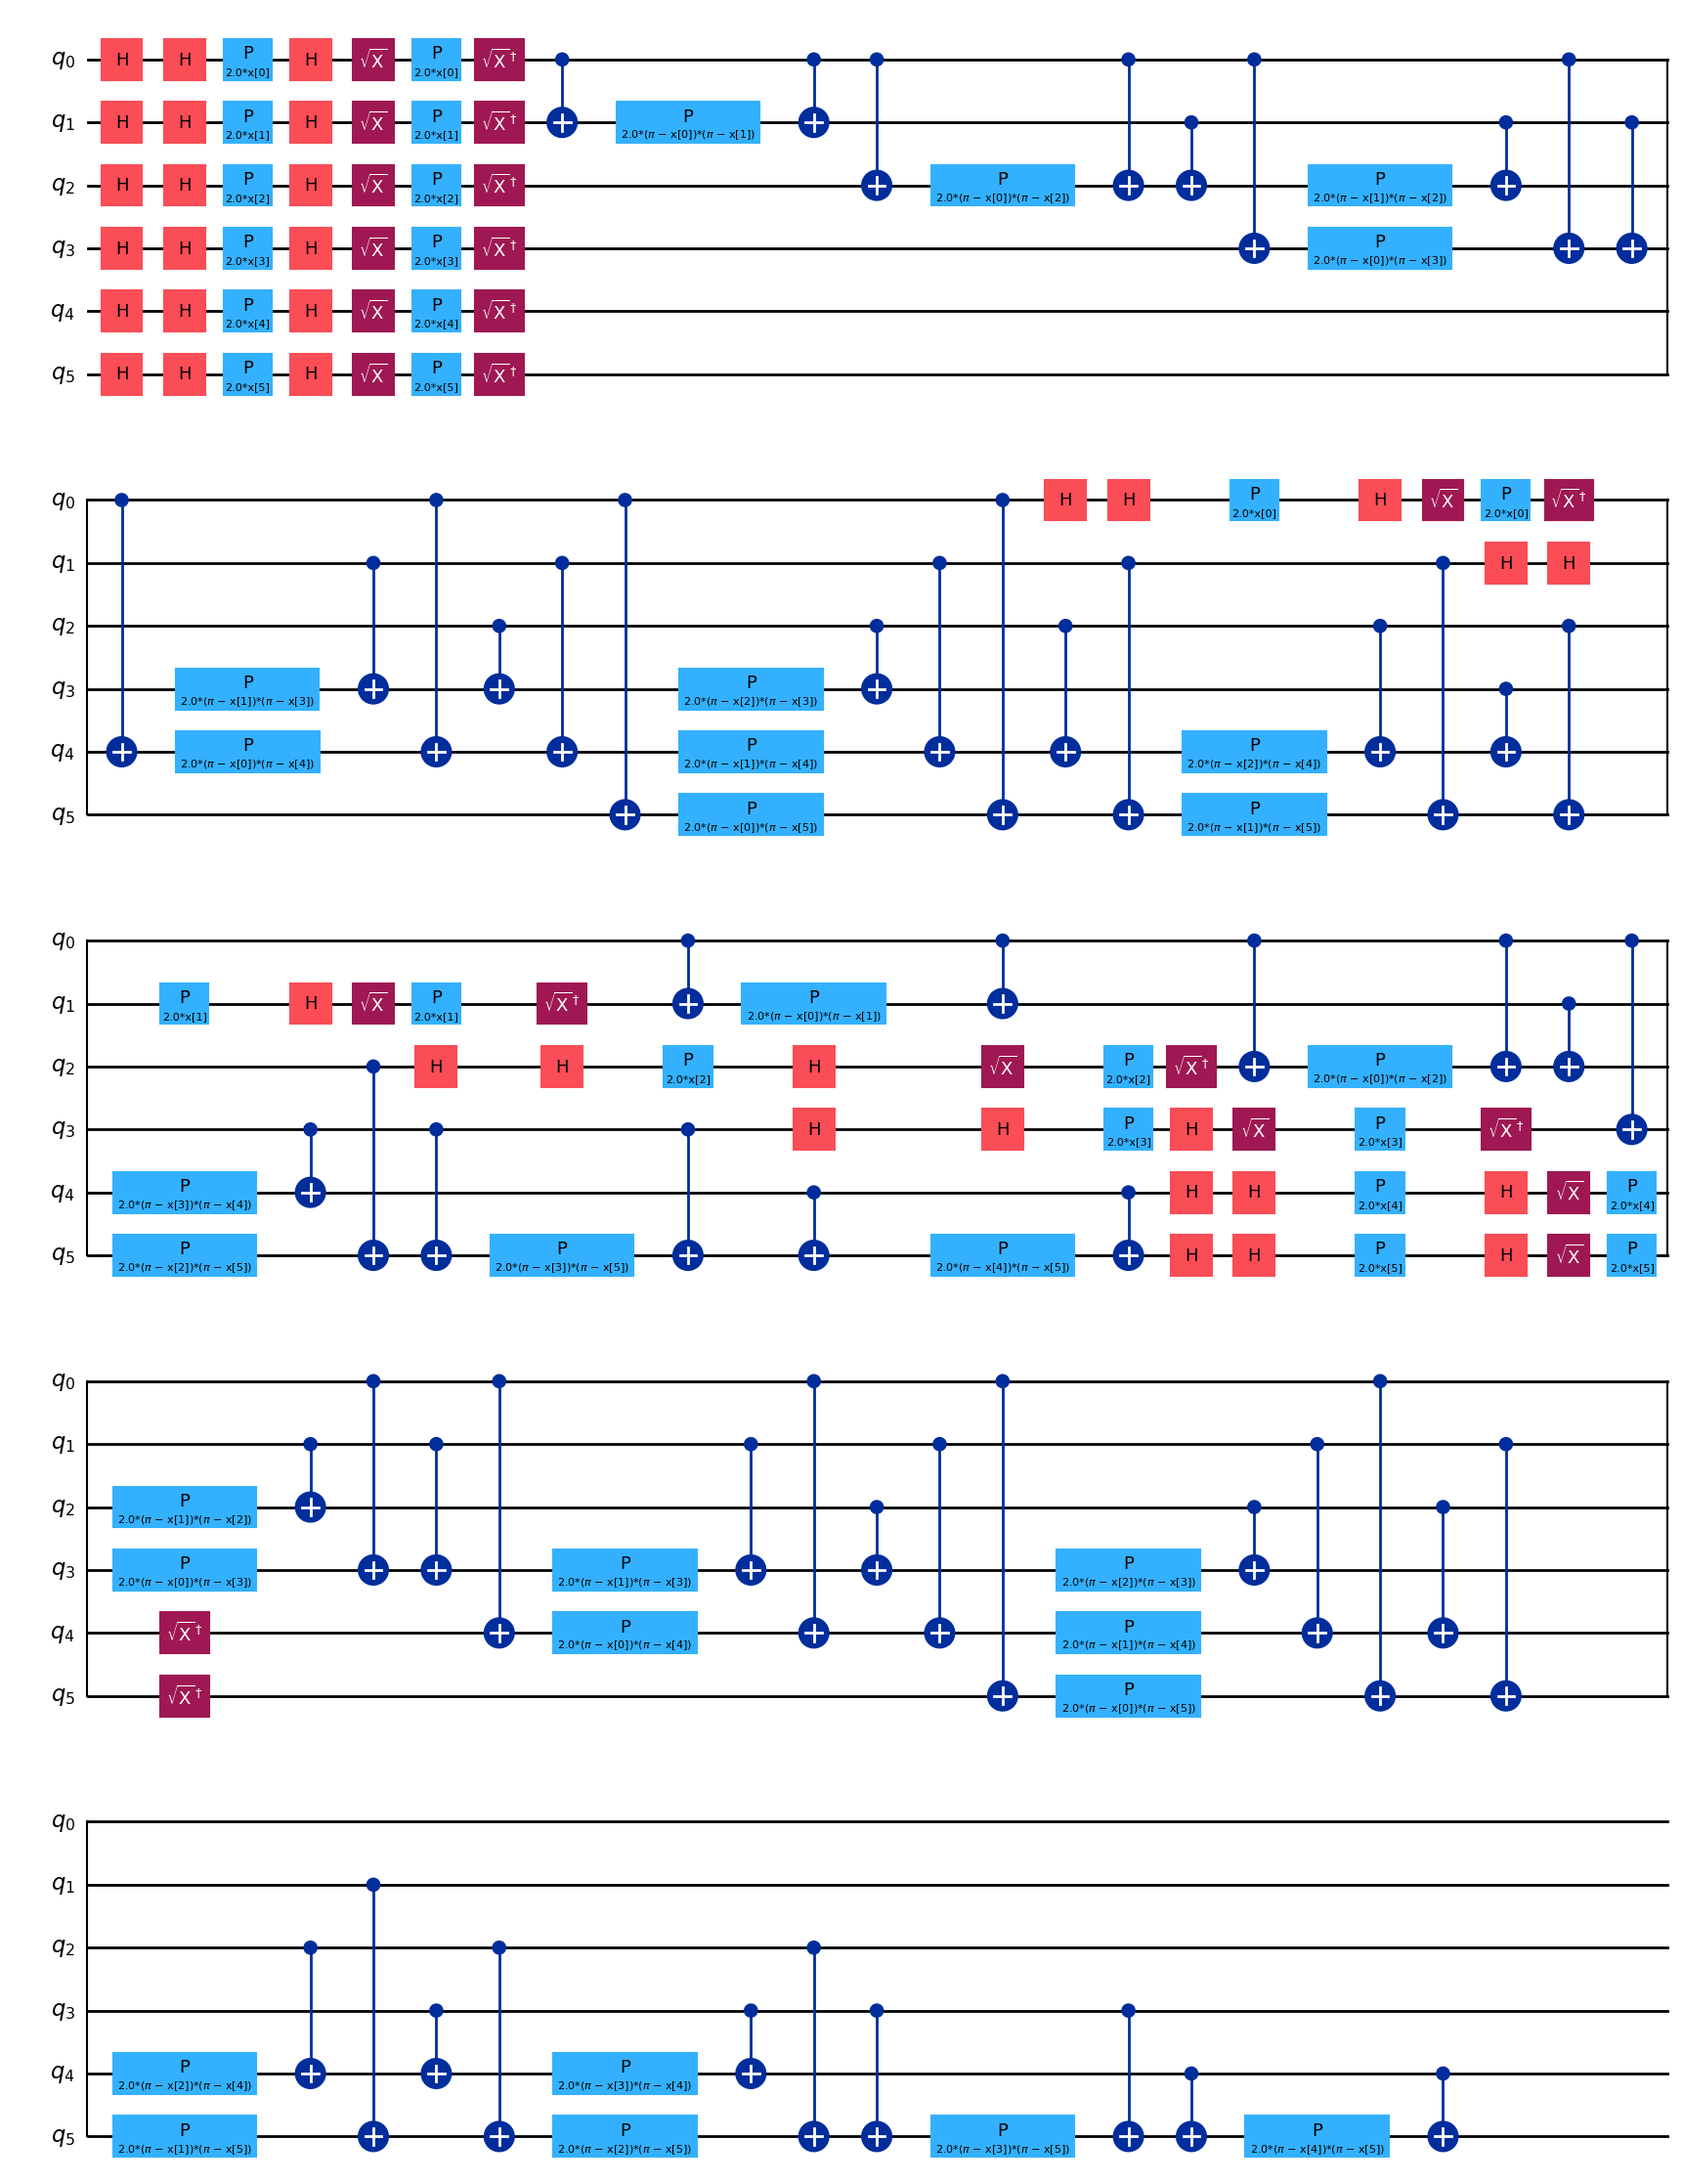

In [ ]:
map_pauli = PauliFeatureMap(feature_dimension=nqubits, reps=2, paulis = ['X', 'Y', 'ZZ'])
map_pauli.decompose().draw('mpl')


A list containing 1s and 0s is prepared for the data set to be used as label.

The data set is loaded and converted into a single input.

This data set is randomized and reordered to obtain a more homogeneous data set for training

In [ ]:
target_o = [1 for i in range(25)]+[0 for i in range(25)]

In [ ]:
pathY=r'../content/dataset/Original/galaxy/'
pathN=r'../content/dataset/Original/No-galaxy/'
nameN=''
nameY=''

inputY=[imageResize(callImage(i+1,pathY,nameY),16) for i in range(25)]
inputN=[imageResize(callImage(i+1,pathN,nameN),16) for i in range(25)]
input_combine = inputY+inputN

In [ ]:
np.random.seed(0)
idx=np.array([int(i) for i in range(50)]).flatten()

np.random.shuffle(idx)

dataInput = list(input_combine[i] for i in idx )
dataTarget = list( imageBinarize(input_combine[i]) for i in idx )

data_target_o=list( target_o[i] for i in idx )

The appearance of 20 samples from the obtained dataset after the resizing process can be seen below

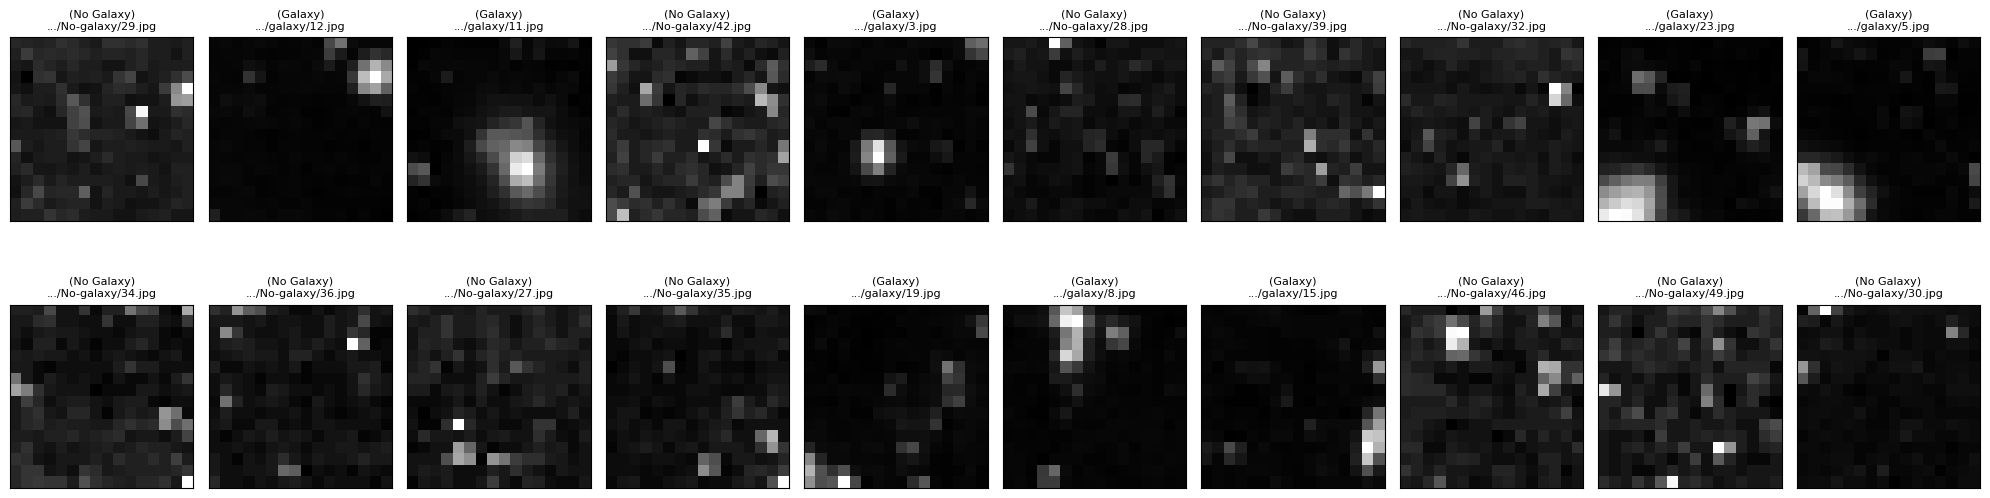

In [ ]:
n_samples_show = 20  # 20 samples
fig, axes = plt.subplots(nrows=2, ncols=n_samples_show // 2, figsize=(20, 6))

for i in range(n_samples_show):
    row = i // (n_samples_show // 2)
    col = i % (n_samples_show // 2)

    # Images with labels
    image = dataInput[i]
    label = "(Galaxy)" if data_target_o[i] == 1 else "(No Galaxy)"
    folder = "galaxy" if data_target_o[i] == 1 else "No-galaxy"
    file_name = f"{idx[i]+1}.jpg"
    short_path = f".../{folder}/{file_name}"

    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])
    axes[row, col].set_title(f"{label}\n{short_path}", fontsize=8)

plt.tight_layout()
plt.show()


The QNNs created for 2 different models are defined as follows.

TLcircuit and Pencoding were used for the first QNN and $\theta$ values ​​for R gates were defined as param_x and param_y.

TLcircuit and PauliFeatureMap were used for the second QNN.

In addition, initial weights were created here to be used when creating the model

In [ ]:
np.random.seed(3)
# Model for LBFGS
# Combining the circuit together with CircuitQNN
nqubits=6
num_inputs=256
qc = QuantumCircuit(nqubits)
qc2 = QuantumCircuit(nqubits)

param_x=[];
for i in range(num_inputs):
    param_x.append(Parameter('x'+str(i)))
for i in range(8):
    param_x.append(np.pi/2)


feature_map = Pencoding(param_x,22)
paulifeature_map = PauliFeatureMap(feature_dimension=nqubits, reps=5, paulis = ['X', 'Y', 'ZZ'])

param_y=[];
for i in range(nqubits*2):
    param_y.append(Parameter('θ'+str(i)))

ansatz = TLcircuit(param_y)


qc.append(feature_map, range(nqubits))
qc.append(ansatz, range(nqubits))

qc2.append(paulifeature_map, range(nqubits))
qc2.append(ansatz, range(nqubits))


qnn2 = SamplerQNN(circuit=qc,input_params=feature_map.parameters,weight_params=ansatz.parameters,interpret=parity, output_shape=2,sampler=Sampler())
qnn3 = SamplerQNN(circuit=qc2,input_params=paulifeature_map.parameters,weight_params=ansatz.parameters,interpret=parity, output_shape=2,sampler=Sampler())

# initial weights for both models

initial_weights = 0.1 * (2 * np.random.rand(qnn2.num_weights) - 1)
initial_weights2 = 0.1 * (2 * np.random.rand(qnn3.num_weights) - 1)


<ipython-input-35-1995233d611c>:33: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qnn2 = SamplerQNN(circuit=qc,input_params=feature_map.parameters,weight_params=ansatz.parameters,interpret=parity, output_shape=2,sampler=Sampler())
<ipython-input-35-1995233d611c>:33: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn2 = SamplerQNN(circuit=qc,input_params=feature_map.parameters,weight_params=ansatz.parameters,interpret=parity, output_shape=2,sampler=Sampler())
<ipython-input-35-1995233d611c>:34: DeprecationWarning: The class ``q

# TwoLocal Model
The model is created using QNN and initial weights with TorchConnector.

Active QNN: Ansatz: TwoLocal, Data Encoder: Pencoding.

LBFGS is selected as the optimizer. Learning rate is 0.05 by default. You can change it according to your preference.

The loss calculation is calculated with CrossEntropyLoss, which measures the difference between the model output and the real labels.

The dataset is loaded and normalized. The data is labeled as 1 and 0.

Then, the accuracy of the model on the data is tested without training the model. The expectation is around 0.50.

In [ ]:
# define optimizer and loss function

model2 = TorchConnector(qnn2, initial_weights)

optimizer = LBFGS(model2.parameters(),lr=0.05)
f_loss = CrossEntropyLoss()

X= [normlaizeData(dataInput[i].flatten()) for i in range(50)]
y01= [data_target_o[i] for i in range(50)]

In [ ]:
from torch import Tensor
# training model accuracy
y_predict = []


for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 0.5


The model is now ready to be fed with the dataset and trained.

The model is prepared again in the same way as the previous step and the model is put into training mode.

Loss is calculated for each input and target pair. The weights of the model are updated and printed with the optimizer at each step and the model is trained to learn the classification.

Then, the train data is tested on the trained model and the accuracy of the model on the training data is calculated.

Loss and Accuracy values are plotted for each step.

In [ ]:
# define optimizer and loss function

model2 = TorchConnector(qnn2, initial_weights)

optimizer = LBFGS(model2.parameters(),lr=0.05)
f_loss = CrossEntropyLoss()

X= [normlaizeData(dataInput[i].flatten()) for i in range(50)]
y01= [data_target_o[i] for i in range(50)]

In [ ]:
from torch import Tensor
import matplotlib.pyplot as plt
import numpy as np

# Lists for loss ve accuracy
loss_values = []
accuracy_values = []

# train mode for model
model2.train()


def closure():
    optimizer.zero_grad()  # reset gradient
    loss = 0.0  # loss
    for x, y_target in zip(X, y01):  # evaluate batch loss
        output = model2(Tensor(x)).reshape(1, 2)  # Forward pass
        loss += f_loss(output, Tensor([y_target]).long())
    loss.backward()  # Backward pass

    # Loss values to the list
    loss_values.append(loss.item())
    print('Loss:', loss.item())

    # Accuracy for each iteration/step
    y_predict = []
    for x in X:
        output = model2(Tensor(x))
        y_predict += [np.argmax(output.detach().numpy())]
    accuracy = sum(np.array(y_predict) == np.array(y01)) / len(y01)
    accuracy_values.append(accuracy)
    print('Accuracy:', accuracy)

    return loss

# Start Optimizer
optimizer.step(closure)
optimizer.step(closure)



Loss: 36.82160568237305
Accuracy: 0.5
Loss: 36.744049072265625
Accuracy: 0.5
Loss: 36.33308029174805
Accuracy: 0.5
Loss: 35.483089447021484
Accuracy: 0.5
Loss: 33.828311920166016
Accuracy: 0.52
Loss: 31.32248878479004
Accuracy: 0.64
Loss: 28.97803497314453
Accuracy: 0.88
Loss: 28.523984909057617
Accuracy: 0.96
Loss: 28.254196166992188
Accuracy: 0.96
Loss: 28.023605346679688
Accuracy: 0.96
Loss: 27.831052780151367
Accuracy: 0.98
Loss: 27.67088508605957
Accuracy: 0.98
Loss: 27.535892486572266
Accuracy: 0.98
Loss: 27.42045783996582
Accuracy: 0.98
Loss: 27.320566177368164
Accuracy: 0.98
Loss: 27.23334312438965
Accuracy: 0.98
Loss: 27.156673431396484
Accuracy: 0.98
Loss: 27.08894920349121
Accuracy: 0.98
Loss: 27.028919219970703
Accuracy: 0.98
Loss: 26.975566864013672
Accuracy: 1.0
Loss: 26.92803382873535
Accuracy: 1.0
Loss: 26.88563346862793
Accuracy: 1.0
Loss: 26.847753524780273
Accuracy: 1.0
Loss: 26.81387710571289
Accuracy: 1.0
Loss: 26.783540725708008
Accuracy: 1.0
Loss: 26.756366729736

tensor(26.9280, grad_fn=<AddBackward0>)

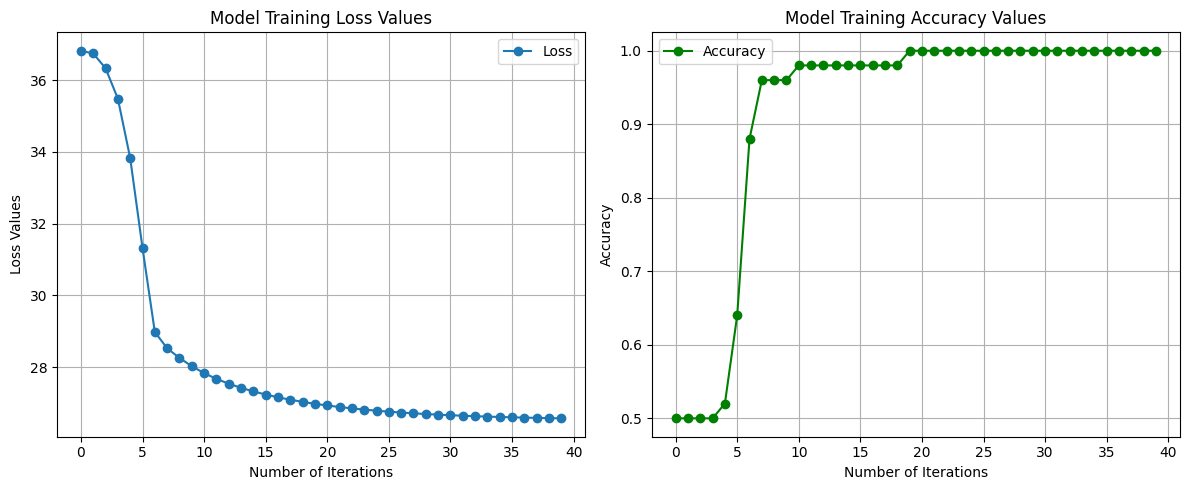

In [ ]:

plt.figure(figsize=(12, 5))
# Loss graph
plt.subplot(1, 2, 1)
plt.grid(axis='x')
plt.grid(axis='y')
plt.plot(loss_values, label="Loss", marker='o')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.title("Model Training Loss Values")
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.grid(axis='x')
plt.grid(axis='y')
plt.plot(accuracy_values, label="Accuracy", marker='o', color='green')
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Model Training Accuracy Values")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# model accuracy on training data
y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 1.0


It is necessary to test the model that has been trained and tested with train data with a data set that it has not seen before.

This test data set is loaded and all the steps applied to the train data set are applied one-to-one.

The accuracy values ​​of the model tested with the test data set of half the size and the same size of the train data set are calculated.

In [ ]:
# model accuracy on test data
target_o = [1 for i in range(25)]+[0 for i in range(25)]

pathY=r'./test/galaxytest/'
pathN=r'./test/nogalaxytest/'
nameN=''
nameY=''
inputY=[imageResize(callImage(i+1,pathY,nameY),16) for i in range(25)]
inputN=[imageResize(callImage(i+1,pathN,nameN),16) for i in range(25)]
input_combine = inputY+inputN

np.random.seed(0)
idx=np.array([int(i) for i in range(50)]).flatten()

np.random.shuffle(idx)

dataInput = list(input_combine[i] for i in idx )
dataTarget = list( imageBinarize(input_combine[i]) for i in idx )

data_target_o=list( target_o[i] for i in idx )


def adjust_input_dimension(data, nqubits):
    chunk_size = len(data) // nqubits
    return [np.mean(data[i * chunk_size:(i + 1) * chunk_size]) for i in range(nqubits)]

Xtest= [normlaizeData(dataInput[i].flatten()) for i in range(25)]
y01test= [data_target_o[i] for i in range(25)]

Xtest1= [normlaizeData(dataInput[i].flatten()) for i in range(50)]
y01test1= [data_target_o[i] for i in range(50)]

y_predict = []
for x in Xtest:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy25data:', sum(y_predict == np.array(y01test))/len(np.array(y01test)))

y_predict1 = []
for x in Xtest1:
    output = model2(Tensor(x))
    y_predict1 += [np.argmax(output.detach().numpy())]

print('Accuracy50data:', sum(y_predict1 == np.array(y01test1))/len(np.array(y01test1)))

Accuracy25data: 0.88
Accuracy50data: 0.88


# Pauli Model
All the steps done for the model created and trained with the first QNN model(TwoLocal model) are repeated for the second QNN model(Pauli model).

Active QNN: Ansatz: TwoLocal, Data Encoder: PauliFeatureMap.

Here, the data encoder is PauliFeatureMap, which requires the input dimensions to be adjusted. (TwoLocal was taking 256 inputs.)

In [ ]:
# define optimizer and loss function

model3 = TorchConnector(qnn3, initial_weights2)

optimizer = LBFGS(model3.parameters(),lr=0.05)
f_loss = CrossEntropyLoss()

def adjust_input_dimension(data, nqubits):
    chunk_size = len(data) // nqubits
    return [np.mean(data[i * chunk_size:(i + 1) * chunk_size]) for i in range(nqubits)]

X = [adjust_input_dimension(normlaizeData(dataInput[i].flatten()), nqubits) for i in range(50)]

y01= [data_target_o[i] for i in range(50)]

In [ ]:
from torch import Tensor
# model accuracy without train
y_predict = []


for x in X:
    output = model3(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 0.5


In [ ]:
# define optimizer and loss function

model3 = TorchConnector(qnn3, initial_weights2)

optimizer = LBFGS(model3.parameters(),lr=0.05)
f_loss = CrossEntropyLoss()


def adjust_input_dimension(data, nqubits):
    chunk_size = len(data) // nqubits
    return [np.mean(data[i * chunk_size:(i + 1) * chunk_size]) for i in range(nqubits)]

X = [adjust_input_dimension(normlaizeData(dataInput[i].flatten()), nqubits) for i in range(50)]


y01= [data_target_o[i] for i in range(50)]

In [ ]:
from torch import Tensor
# start training

# set model to training mode
model3.train()

# Lists for loss ve accuracy
loss_values=[]
accuracy_values=[]

def closure():
    optimizer.zero_grad()  # initialize gradient
    loss = 0.0 # initialize loss
    for x, y_target in zip(X, y01): # evaluate batch loss
        output = model3(Tensor(x)).reshape(1, 2) # forward pass
        loss += f_loss(output, Tensor([y_target]).long())
    loss.backward()

    loss_values.append(loss.item()) # backward pass
    # Loss values to the list
    print('Loss:', loss.item())

    # Accuracy for each iteration/step
    y_predict = []
    for x in X:
        output = model3(Tensor(x))
        y_predict += [np.argmax(output.detach().numpy())]
    accuracy = sum(np.array(y_predict) == np.array(y01)) / len(y01)
    accuracy_values.append(accuracy)
    print('Accuracy:', accuracy)

    return loss

# Start Optimizer
optimizer.step(closure)
optimizer.step(closure)




Loss: 33.54393005371094
Accuracy: 0.5
Loss: 33.36146926879883
Accuracy: 0.58
Loss: 33.11021041870117
Accuracy: 0.66
Loss: 32.81373596191406
Accuracy: 0.84
Loss: 32.33491897583008
Accuracy: 0.86
Loss: 31.797760009765625
Accuracy: 0.88
Loss: 31.47382164001465
Accuracy: 0.9
Loss: 31.235172271728516
Accuracy: 0.9
Loss: 31.017982482910156
Accuracy: 0.88
Loss: 30.818552017211914
Accuracy: 0.84
Loss: 30.642620086669922
Accuracy: 0.84
Loss: 30.492143630981445
Accuracy: 0.84
Loss: 30.365680694580078
Accuracy: 0.84
Loss: 30.25989532470703
Accuracy: 0.84
Loss: 30.171079635620117
Accuracy: 0.84
Loss: 30.096393585205078
Accuracy: 0.84
Loss: 30.033700942993164
Accuracy: 0.84
Loss: 29.981157302856445
Accuracy: 0.84
Loss: 29.937101364135742
Accuracy: 0.84
Loss: 29.899991989135742
Accuracy: 0.84
Loss: 29.868553161621094
Accuracy: 0.86
Loss: 29.84166717529297
Accuracy: 0.86
Loss: 29.818519592285156
Accuracy: 0.86
Loss: 29.798423767089844
Accuracy: 0.86
Loss: 29.780866622924805
Accuracy: 0.86
Loss: 29.76

tensor(29.8686, grad_fn=<AddBackward0>)

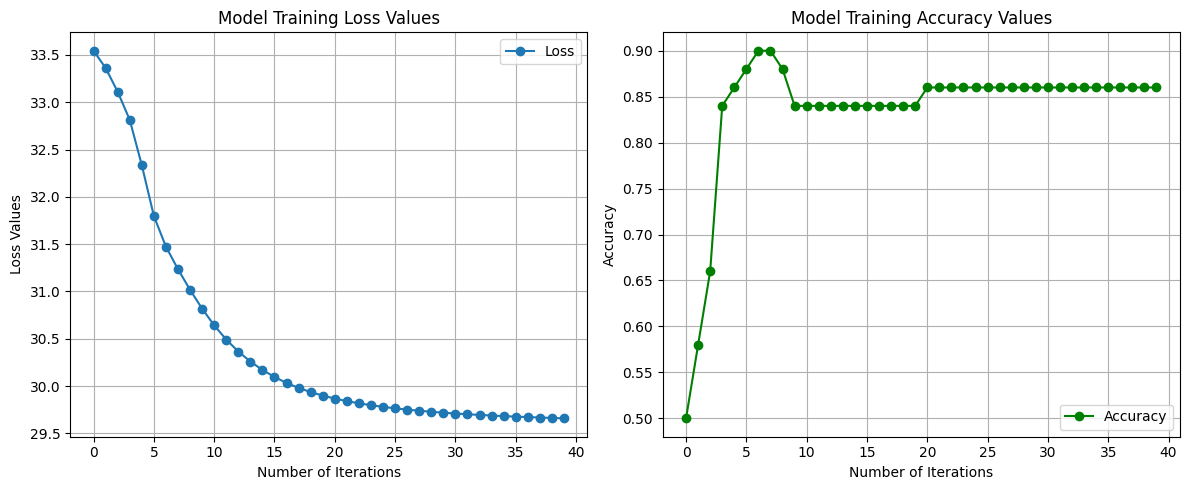

In [ ]:
plt.figure(figsize=(12, 5))



# Loss graph
plt.subplot(1, 2, 1)
plt.grid(axis='x')
plt.grid(axis='y')
plt.plot(loss_values, label="Loss", marker='o')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.title("Model Training Loss Values")
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.grid(axis='x')
plt.grid(axis='y')
plt.plot(accuracy_values, label="Accuracy", marker='o', color='green')
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Model Training Accuracy Values")
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
# model accuracy on training data
y_predict = []
for x in X:
    output = model3(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(y01))/len(np.array(y01)))

Accuracy: 0.86


In [ ]:
# model accuracy on test data
target_o = [1 for i in range(25)]+[0 for i in range(25)]

pathY=r'./test/galaxytest/'
pathN=r'./test/nogalaxytest/'
nameN=''
nameY=''
inputY=[imageResize(callImage(i+1,pathY,nameY),16) for i in range(25)]
inputN=[imageResize(callImage(i+1,pathN,nameN),16) for i in range(25)]
input_combine = inputY+inputN

np.random.seed(0)
idx=np.array([int(i) for i in range(50)]).flatten()

np.random.shuffle(idx)

dataInput = list(input_combine[i] for i in idx )
dataTarget = list( imageBinarize(input_combine[i]) for i in idx )

data_target_o=list( target_o[i] for i in idx )


def adjust_input_dimension(data, nqubits):
    chunk_size = len(data) // nqubits
    return [np.mean(data[i * chunk_size:(i + 1) * chunk_size]) for i in range(nqubits)]

Xtest= [adjust_input_dimension(normlaizeData(dataInput[i].flatten()), nqubits) for i in range(25)]
y01test= [data_target_o[i] for i in range(25)]

Xtest1= [adjust_input_dimension(normlaizeData(dataInput[i].flatten()), nqubits) for i in range(50)]
y01test1= [data_target_o[i] for i in range(50)]

y_predict = []
for x in Xtest:
    output = model3(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy25data:', sum(y_predict == np.array(y01test))/len(np.array(y01test)))

y_predict1 = []
for x in Xtest1:
    output = model3(Tensor(x))
    y_predict1 += [np.argmax(output.detach().numpy())]

print('Accuracy50data:', sum(y_predict1 == np.array(y01test1))/len(np.array(y01test1)))

Accuracy25data: 0.84
Accuracy50data: 0.84


## 4- Results

### 4.1- Learning Rates

Model training outcomes using four different Learning Rates (0.01, 0.05, 0.10, and 0.20) with fixed training data size (50) are compared in terms of Training Time, Accuracy on the Training Dataset, and Accuracy on the Test Dataset for both data encoders. The effects of Learning Rate on the efficiency of models prepared with these data encoders have been identified.

Changes in Training Time do not significantly impact model performance. Among the four LR values tested, the QNN with the TwoLocal encoder completed training in 37 minutes, while the QNN with the PauliFeatureMap encoder finished training in 28 minutes. This indicates that PauliFeatureMap operates faster. The obtained results are illustrated in the Figure 1:

<center><b>Figure 1:</b> Training time for different learning rates.</center>

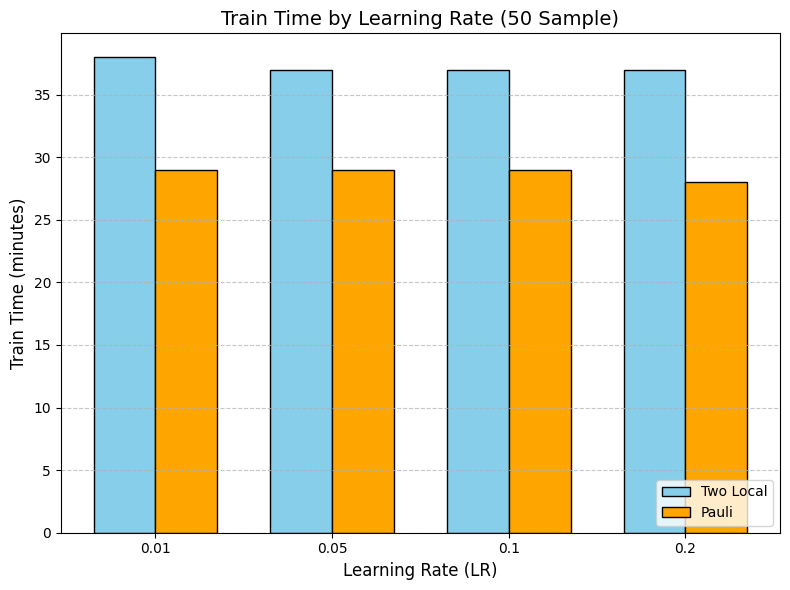

For Accuracy on the Training Dataset, TwoLocal consistently outperforms Pauli at lower LR values, indicating its stronger ability to fit the training data. However, as LR reaches 0.10, the accuracy of both models converges, suggesting diminishing benefits from TwoLocal's additional complexity at higher learning rates. The obtained results are displayed in Figure 2:

<center><b>Figure 2:</b> Accuracy on Train Data for different learning rates.</center>

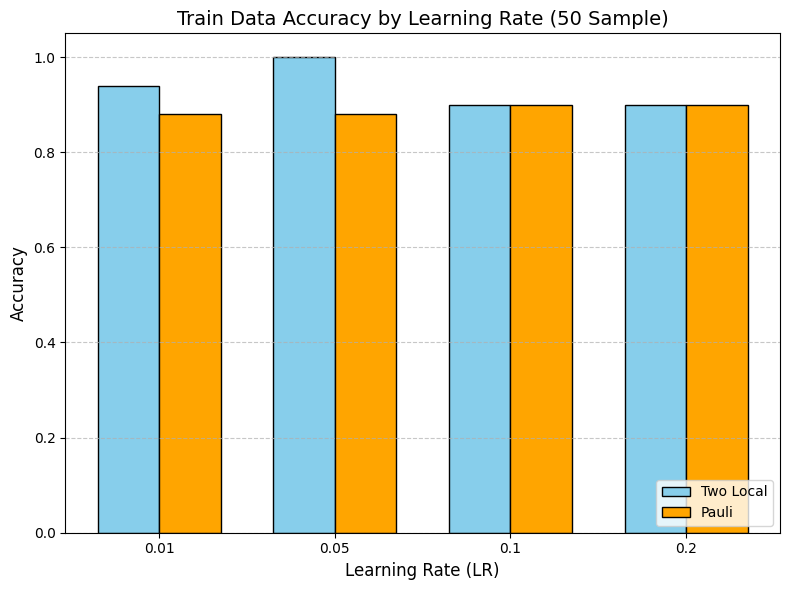

For Accuracy on the Test Dataset, two different test dataset sizes were used: half the size and equal size to the training dataset. TwoLocal achieved higher accuracy on half-sized test datasets, whereas Pauli delivered higher accuracy on equal-sized test datasets. At lower Learning Rates, TwoLocal's accuracy is superior to Pauli's; however, at LR = 0.10 and above, Pauli surpasses TwoLocal in accuracy. The obtained results are shown in the figure below:

<center><b>Figure 3:</b> Accuracy on Test Data for different learning rates.</center>

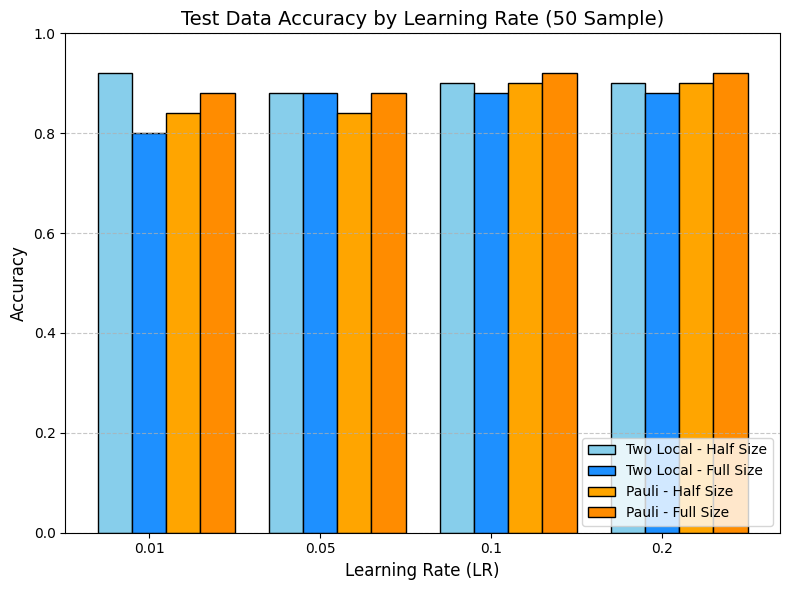

Additionally, as the Learning Rate increases, the prediction consistency of TwoLocal across both half-sized and full-sized test datasets becomes more aligned.

### 4.2- Training Dataset Size

The results of model training using four different Training Dataset sizes (26, 50, 76, 100) are compared in terms of Training Time, Accuracy on the Training Dataset, and Accuracy on the Test Dataset for both data encoders. The impact of Training Dataset size on the efficiency of models prepared with these data encoders has been identified.

Training Time increases proportionally with Training Dataset size (sample size) for both models. The training time for TwoLocal and PauliFeatureMap also grows proportionally with the sample size. For a sample size of 26, the QNN with TwoLocal completes training in 19 minutes, whereas the QNN with PauliFeatureMap completes training in 16 minutes. When the sample size increases to 100, these times rise to 74 minutes for TwoLocal and 59 minutes for Pauli. The obtained results are shown in Figure 4:

<center><b>Figure 4:</b> Training time for different sample sizes.</center>

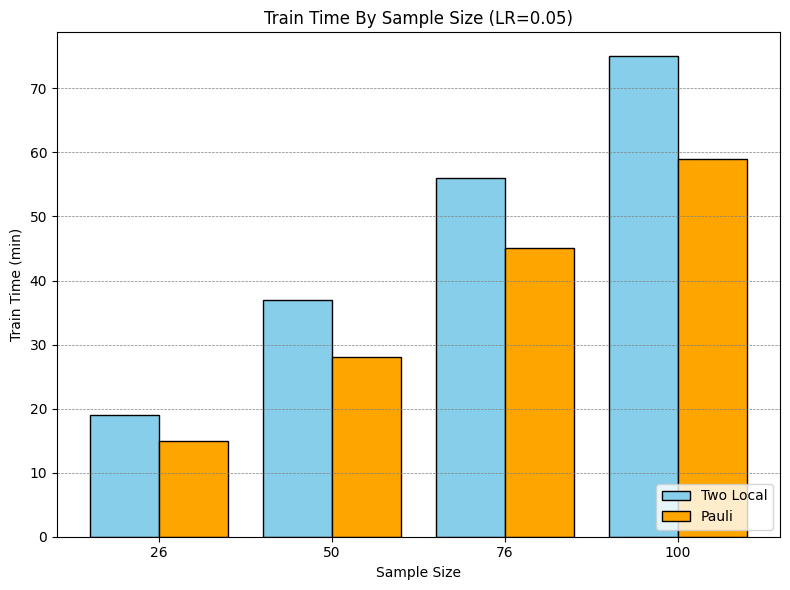

Accuracy on the Training Dataset is not significantly affected by sample size. For every sample size, TwoLocal consistently achieves an accuracy above 0.98, while Pauli fails to exceed an accuracy of 0.90. The obtained results are illustrated in Figure 5:

<center><b>Figure 5:</b> Accuracy on Train Data for different sample sizes.</center>

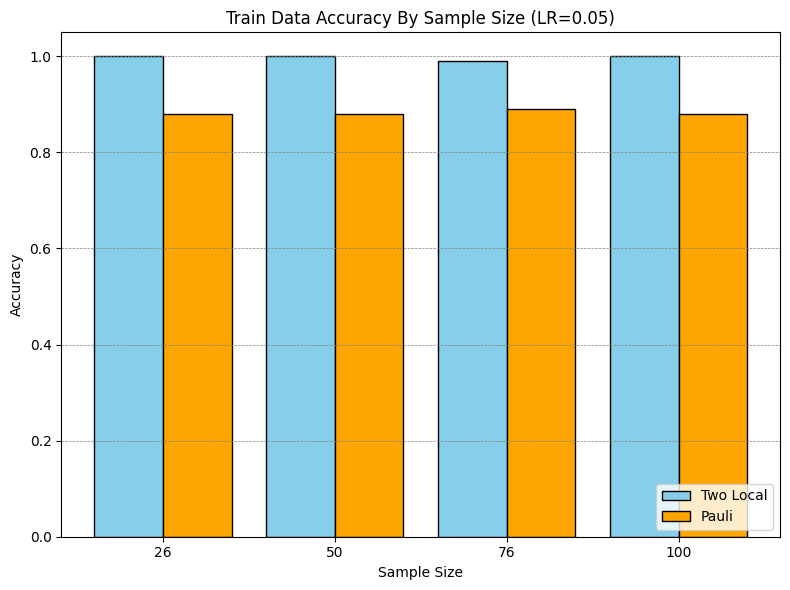

Accuracy on the Test Dataset reveals some notable trends related to sample size. For TwoLocal, as the sample size increases, the model's accuracy on the test dataset shows a tendency to decrease, indicating a potential overfitting issue. For every sample size, TwoLocal achieves higher accuracy with half-sized test datasets. In contrast, for Pauli, the test dataset accuracy declines even more dramatically as the sample size increases. This suggests that the PauliFeatureMap is more prone to overfitting, likely because its simpler structure struggles to generalize well as the training dataset grows. However, for sample sizes of 26 and 50, Pauli demonstrates higher accuracy on equal-sized test datasets, while for sample sizes of 76 and 100, this trend reverses, and Pauli begins to show behavior similar to TwoLocal. This suggests that the optimal sample size for Pauli is between 50 and 76, whereas for TwoLocal, the ideal point seems to be at a sample size of 50. The obtained results are depicted in Figure 6:

<center><b>Figure 6:</b> Accuracy on Test Data for different sample sizes.</center>

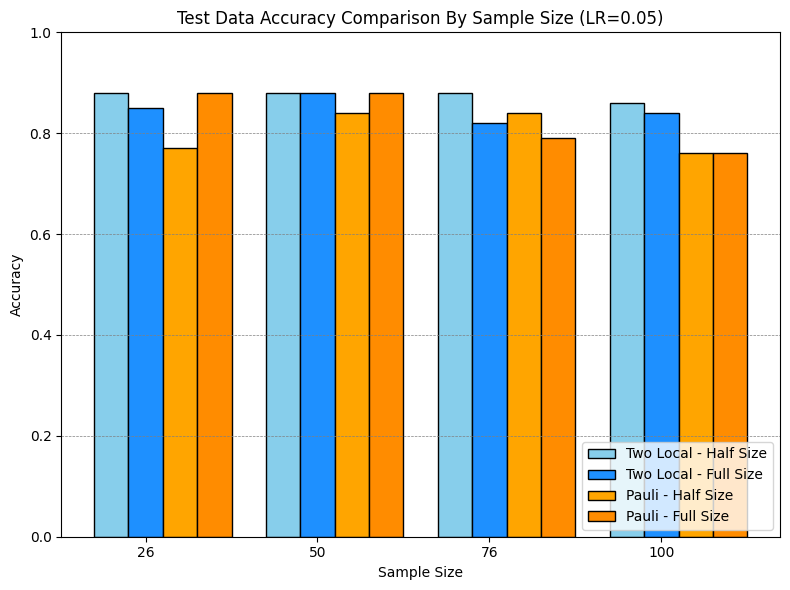


The training progress of both models was examined with the default sample size of 50 and a learning rate of 0.05. During the 40-step model training, it was observed that the model with the TwoLocal feature started to decrease its loss values at a slow rate initially, then gained significant momentum. On the other hand, the model with the PauliFeatureMap showed a quicker reduction in loss values, but the rate of decrease did not reach the significant acceleration observed in the TwoLocal model.

In other words, the TwoLocal model responded to training later but with greater intensity, while the PauliFeatureMap model responded faster but less intensely. Additionally, TwoLocal model achieved its peak training accuracy at iteration 20, with the first significant accuracy improvement observed around iteration 10. In contrast, the PauliFeatureMap model reached maximum efficiency at iteration 7th, followed by a slight decline in accuracy.

The Loss vs. Iterations and Accuracy vs. Iterations graphs for the TwoLocal model are provided in Figure 7:

<center><b>Figure 7:</b> Variation of Loss and Accuracy values with iterations for the TwoLocal model. </center>

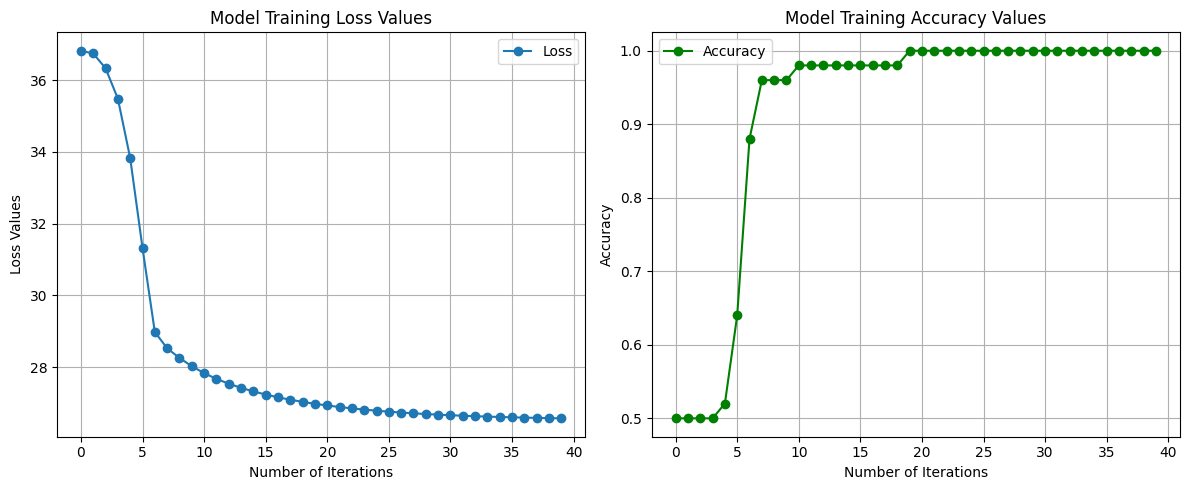


The Loss vs. Iterations and Accuracy vs. Iterations graphs for the PauliMap model are also provided in Figure 8:

<center><b>Figure 8:</b> Variation of Loss and Accuracy values with iterations for the Pauli model. </center>

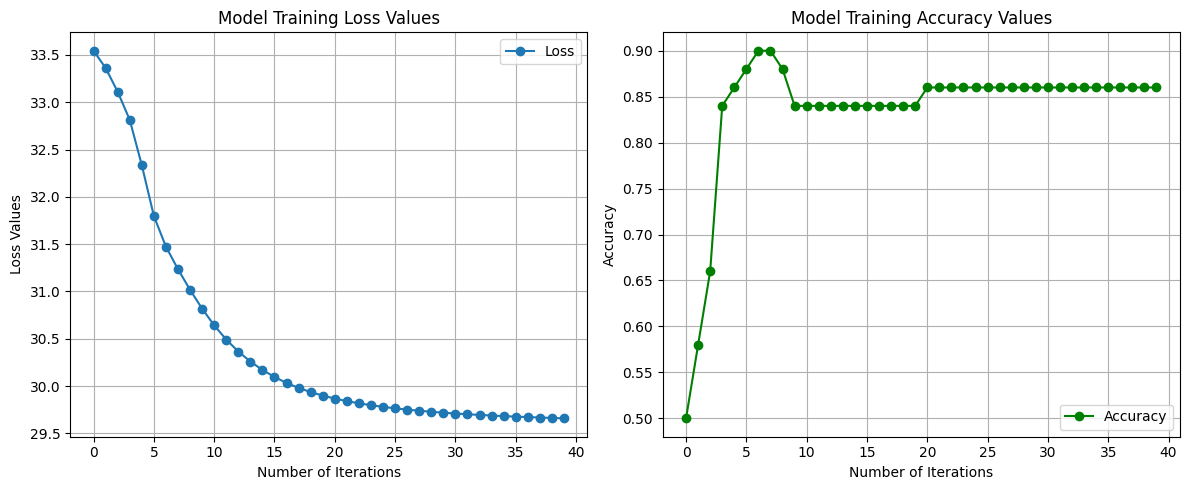

In summary, the TwoLocal encoder demonstrated a better performance on smaller test datasets and lower learning rates, excelling in training accuracy but requiring longer training times. Meanwhile, the PauliFeatureMap encoder performed better on larger test datasets and exhibited faster training, though it showed a higher tendency for overfitting with increasing dataset size.



## 5- Conclusion

This study investigated the potential of Quantum Neural Networks (QNNs) in galaxy classification tasks using a dataset derived from the Hubble Deep Field image. By leveraging quantum properties, QNNs demonstrated promising results in handling small datasets while maintaining accuracy and efficiency.

The key findings are as follows:

* Effects of Learning Rate:
 * Learning rate had minimal impact on training time but significantly influenced accuracy, especially at lower values for the TwoLocal model compared to the Pauli model.
 * The TwoLocal model achieved higher accuracy on the training dataset at lower LR values compared to the Pauli model. However, this difference diminished as the LR increased.
 * The TwoLocal model outperformed the Pauli model on smaller test datasets, while the Pauli model achieved better results on larger test datasets.

* Effects of Sample Size:
 * As expected, training time increased proportionally with sample size. TwoLocal's more complex structure resulted in longer training times compared to the Pauli model in all cases.
 * On the training dataset, the TwoLocal model consistently outperformed the Pauli model in terms of accuracy, regardless of the sample size.
 * On the test datasets, the TwoLocal model always achieved higher accuracy on smaller test datasets. The Pauli model performed better on smaller test datasets when trained on smaller training datasets, but this reversed as the training dataset size increased.
 * Overfitting tendencies were observed in both models as sample size increased. This was more pronounced in the Pauli model, likely due to its simpler structure and tendency to overfit smaller datasets.

Future work should investigate some regularization techniques to reduce this behavior. Additionally, re-optimization of parameters, especially for larger datasets, can reduce overfitting.

The results show that QNNs can serve as a viable alternative to classical methods, and manual approaches. Moreover, the ability of QNNs to generalize effectively to unseen data also opens up the potential for broader applications in astrophysics studies.

Despite these encouraging results, relying on classical simulation of quantum circuits imposes limitations on scalability and accuracy. Testing on real quantum hardware is critical to address challenges such as noise, which may not be accurately modeled by classical simulations. Techniques like error mitigation and noise-aware optimization could improve the reliability of results on real quantum devices. Additionally, overfitting behavior requires further study of the model on quantum hardware and re-optimization of model parameters accordingly.

In conclusion, this study highlights the applicability of QNNs in astrophysics, particularly in scenarios with limited datasets such as object classification or galaxy detection. These results lay the foundation for exploring quantum approaches to large-scale galaxy classification and other data-intensive tasks in observational astronomy.

Both models reached high accuracy around the iteration 10, which is impressive given the training lasted for 40 iterations. This demonstrates the rapid learning capability of QNNs, potentially offering advantages over classical neural networks in similar tasks where computational efficiency is critical.

<a id="References"></a>
# References

[1] Lintott, C. J., Schawinski, K., Slosar, A., Land, K., Bamford, S., Thomas, D., Raddick, M. J., Nichol, R. C., Szalay, A., Andreescu, D., Murray, P., & Vandenberg, J. (2008). Galaxy Zoo: Morphologies derived from visual inspection of galaxies from the Sloan Digital Sky Survey. Monthly Notices of the Royal Astronomical Society, 389(3), 1179–1189. https://doi.org/10.1111/j.1365-2966.2008.13689.x

[2] Schuld, M., & Petruccione, F. (2021). Machine Learning with Quantum Computers. Springer International Publishing.

[3] Sakhare, N. N., Mondal, D., Vigenesh, M., G. B., Dhabliya, D., & Purohit, A. K. (2023). Investigating the Use of Neural Networks for AI-Based Image Recognition Systems. 2023 3rd International Conference on Smart Generation Computing, Communication and Networking (SMART GENCON), Bangalore, India, 1–5. https://doi.org/10.1109/SMARTGENCON60755.2023.10442103

[4] Williams, R. E., Blacker, B., Dickinson, M., Dixon, W. V., Ferguson, H. C., Fruchter, A. S., Giavalisco, M., Gilliland, R. L., Heyer, I., Katsanis, R., Levay, Z., Lucas, R. A., McElroy, D. B., Petro, L., Postman, M., Adorf, H.-M., & Hook, R. N. (1996). The Hubble Deep Field: Observations, Data Reduction, and Galaxy Photometry. The Astronomical Journal, 112(4), 1335. https://doi.org/10.1086/118105